# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import sklearn
plt.style.use('bmh')

# 01 Read in Sample data and Adjust for Time Zone

In [2]:
#A. Read in file
filepath = "../Data/mergedSample.csv"
data = pd.read_csv(filepath)
data = data.rename(columns = {"demand": "mw"})
del data['Unnamed: 0']

In [3]:
data.head()

,datetime,mw,abbr,datetime_utc,date,hour,usaf,wban,windir,windspeed,skycond,tempc,dewpoint,tempf
0,2018-10-14 00:00:00,10443.0,ISNE,2018-10-14 05:00:00,2018-10-14,0,725090,14739,999,NaN,99999,NaN,NaN,NaN
1,2018-10-13 23:00:00,10884.0,ISNE,2018-10-14 04:00:00,2018-10-13,23,725090,14739,310,31.0,22000,8.3,39.92,46.94
2,2018-10-13 22:00:00,11436.0,ISNE,2018-10-14 03:00:00,2018-10-13,22,725090,14739,290,41.0,22000,9.4,39.92,48.92
3,2018-10-13 21:00:00,12203.0,ISNE,2018-10-14 02:00:00,2018-10-13,21,725090,14739,280,46.0,22000,10.6,39.92,51.08
4,2018-10-13 20:00:00,12774.0,ISNE,2018-10-14 01:00:00,2018-10-13,20,725090,14739,280,31.0,22000,10.6,39.92,51.08


In [4]:
data['datetime'] = pd.to_datetime(data.datetime)  # Convert to datetime object
data.datetime.asfreq("H")  #  informs data is hourly

1970-01-01   NaT
Freq: H, Name: datetime, dtype: datetime64[ns]

In [5]:
#C. Summarize dataset info
print(data.columns)
data.describe()

Index(['datetime', 'mw', 'abbr', 'datetime_utc', 'date', 'hour', 'usaf',
       'wban', 'windir', 'windspeed', 'skycond', 'tempc', 'dewpoint', 'tempf'],
      dtype='object')


,mw,hour,usaf,wban,windir,windspeed,skycond,tempc,dewpoint,tempf
count,23745.000000,23745.000000,23745.0,23745.0,23745.000000,23737.000000,23745.000000,23744.000000,23740.000000,23744.000000
mean,14088.013813,11.495683,725090.0,14739.0,234.813813,50.274424,11532.829522,11.721210,41.204847,53.098177
std,2580.859962,6.926792,0.0,0.0,175.869372,24.696145,9790.037012,10.068497,19.327501,18.123294
min,9016.000000,0.000000,725090.0,14739.0,10.000000,0.000000,30.000000,-22.800000,-25.060000,-9.040000
25%,12255.000000,5.000000,725090.0,14739.0,130.000000,31.000000,1524.000000,3.900000,28.040000,39.020000
50%,13786.000000,11.000000,725090.0,14739.0,220.000000,46.000000,7620.000000,11.700000,44.060000,53.060000
75%,15526.000000,18.000000,725090.0,14739.0,290.000000,67.000000,22000.000000,20.000000,57.020000,68.000000
max,25463.000000,23.000000,725090.0,14739.0,999.000000,216.000000,99999.000000,36.100000,78.080000,96.980000


# Define Features

In [6]:
#A. Extract additional time variables 

data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['dayofweek'] = data['datetime'].dt.dayofweek
data['dayofyear'] = data['datetime'].dt.dayofyear
data['date'] = data['datetime'].dt.date
data['hour'] = data['datetime'].dt.hour   
data['weekday'] = (0< data['dayofweek']) &  (data['dayofweek'] <6)

In [7]:
data['weekday'].value_counts()

True     16959
False     6786
Name: weekday, dtype: int64

In [8]:
#B. Extract peak and average info

dategroup = data.groupby(by = 'date')
#data = dategroup.mw.mean()
data = data.join(data.groupby('date')['mw'].max(), on = 'date', rsuffix='_avg')
data = data.join(data.groupby('date')['mw'].max(), on = 'date', rsuffix='_peak')
data = data.join(data.groupby('date')['tempf'].max(), on = 'date', rsuffix='_peak')
data = data.join(data.groupby('date')['tempf'].mean(), on = 'date', rsuffix='_avg')

In [9]:
data.head()

,datetime,mw,abbr,datetime_utc,date,hour,usaf,wban,windir,windspeed,...,tempf,year,month,dayofweek,dayofyear,weekday,mw_avg,mw_peak,tempf_peak,tempf_avg
0,2018-10-14 00:00:00,10443.0,ISNE,2018-10-14 05:00:00,2018-10-14,0,725090,14739,999,NaN,...,NaN,2018,10,6,287,False,10443.0,10443.0,NaN,NaN
1,2018-10-13 23:00:00,10884.0,ISNE,2018-10-14 04:00:00,2018-10-13,23,725090,14739,310,31.0,...,46.94,2018,10,5,286,True,13212.0,13212.0,53.96,50.572727
2,2018-10-13 22:00:00,11436.0,ISNE,2018-10-14 03:00:00,2018-10-13,22,725090,14739,290,41.0,...,48.92,2018,10,5,286,True,13212.0,13212.0,53.96,50.572727
3,2018-10-13 21:00:00,12203.0,ISNE,2018-10-14 02:00:00,2018-10-13,21,725090,14739,280,46.0,...,51.08,2018,10,5,286,True,13212.0,13212.0,53.96,50.572727
4,2018-10-13 20:00:00,12774.0,ISNE,2018-10-14 01:00:00,2018-10-13,20,725090,14739,280,31.0,...,51.08,2018,10,5,286,True,13212.0,13212.0,53.96,50.572727


In [10]:
#C. Extract lags for weather and MW
data['mw_3hrlag'] = data.mw.shift(3)
data['mw_24hrlag'] = data.mw.shift(24)
data['mw_weeklag'] = data.mw.shift(168)
data['tempf_3hrlag'] = data.tempf.shift(3)
data['tempf_24hrlag'] = data.tempf.shift(24)
data['tempf_weeklag'] = data.tempf.shift(168)


In [11]:
# Create Traditional weather variable

# CDD
data['cdd60_temp'] =  data['tempf_avg'] -60
data['zero'] = 0 
data['cdd60'] = data[['zero', 'cdd60_temp']].max(axis=1)
del data['cdd60_temp']

# HDD 
data['hdd60_temp'] =  data['tempf_avg'] -60
data['hdd60'] = data[['zero', 'hdd60_temp']].max(axis=1)
del data['hdd60_temp']

# CDH
data['cdh60_temp'] =  data['tempf']-60
data['cdh60'] = data[['zero', 'cdh60_temp']].max(axis=1)
data['cdh60sqr'] = data['cdh60']**2
del data['cdh60_temp']

# HDH 
data['hdh60_temp'] =  data['tempf_avg'] -60
data['zero'] = 0 
data['hdh60'] = data[['zero', 'hdh60_temp']].max(axis=1)
data['hdh60sqr'] = data['hdh60']**2
del data['hdh60_temp']
del data['zero']

# Rolling average of CDH
data['cdh_3hrma'] = data.cdh60.rolling(3).mean()
data['cdh_24hrma'] = data.cdh60.rolling(24).mean()
data['cdh_weeklag'] = data.cdh60.rolling(168).mean()

# Rolling average of HDH
data['hdh_3hrma'] = data.hdh60.rolling(3).mean()
data['hdh_24hrma'] = data.hdh60.rolling(24).mean()
data['hdh_weeklag'] = data.hdh60.rolling(168).mean()

#Remove obs with blank data
data.dropna(how = 'any', inplace = True)
data.head()

,datetime,mw,abbr,datetime_utc,date,hour,usaf,wban,windir,windspeed,...,cdh60,cdh60sqr,hdh60,hdh60sqr,cdh_3hrma,cdh_24hrma,cdh_weeklag,hdh_3hrma,hdh_24hrma,hdh_weeklag
169,2018-10-06 14:00:00,11813.0,ISNE,2018-10-06 19:00:00,2018-10-06,14,725090,14739,80,36.0,...,0.98,0.9604,0.0,0.0,0.680000,5.427500,4.570833,0.0,3.581667,4.31631
170,2018-10-06 13:00:00,11461.0,ISNE,2018-10-06 18:00:00,2018-10-06,13,725090,14739,110,31.0,...,0.98,0.9604,0.0,0.0,0.680000,4.715000,4.576667,0.0,3.325833,4.31631
171,2018-10-06 12:00:00,11388.0,ISNE,2018-10-06 17:00:00,2018-10-06,12,725090,14739,110,31.0,...,0.98,0.9604,0.0,0.0,0.980000,3.972500,4.582500,0.0,3.070000,4.31631
172,2018-10-06 11:00:00,11596.0,ISNE,2018-10-06 16:00:00,2018-10-06,11,725090,14739,999,21.0,...,0.00,0.0000,0.0,0.0,0.653333,3.264167,4.582500,0.0,2.814167,4.31631
173,2018-10-06 10:00:00,11771.0,ISNE,2018-10-06 15:00:00,2018-10-06,10,725090,14739,100,31.0,...,0.00,0.0000,0.0,0.0,0.326667,2.683333,4.582500,0.0,2.558333,4.31631


# Exploratory Plots

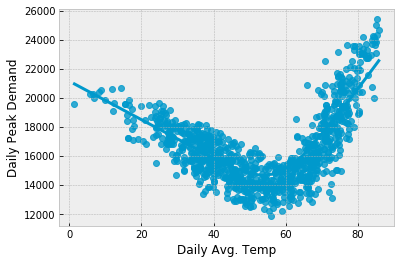

In [12]:

# A. Daily Peak versus Avg. Daily Temp
peak = data.groupby('date')['mw'].max()
avgtemp = data.groupby('date')['tempf'].mean()

sns.regplot(avgtemp, peak, lowess = True, color = (0,0.6,0.8, 0.6))
plt.ylabel('Daily Peak Demand')
plt.xlabel('Daily Avg. Temp')
plt.show()

In [13]:
data.head()

,datetime,mw,abbr,datetime_utc,date,hour,usaf,wban,windir,windspeed,...,cdh60,cdh60sqr,hdh60,hdh60sqr,cdh_3hrma,cdh_24hrma,cdh_weeklag,hdh_3hrma,hdh_24hrma,hdh_weeklag
169,2018-10-06 14:00:00,11813.0,ISNE,2018-10-06 19:00:00,2018-10-06,14,725090,14739,80,36.0,...,0.98,0.9604,0.0,0.0,0.680000,5.427500,4.570833,0.0,3.581667,4.31631
170,2018-10-06 13:00:00,11461.0,ISNE,2018-10-06 18:00:00,2018-10-06,13,725090,14739,110,31.0,...,0.98,0.9604,0.0,0.0,0.680000,4.715000,4.576667,0.0,3.325833,4.31631
171,2018-10-06 12:00:00,11388.0,ISNE,2018-10-06 17:00:00,2018-10-06,12,725090,14739,110,31.0,...,0.98,0.9604,0.0,0.0,0.980000,3.972500,4.582500,0.0,3.070000,4.31631
172,2018-10-06 11:00:00,11596.0,ISNE,2018-10-06 16:00:00,2018-10-06,11,725090,14739,999,21.0,...,0.00,0.0000,0.0,0.0,0.653333,3.264167,4.582500,0.0,2.814167,4.31631
173,2018-10-06 10:00:00,11771.0,ISNE,2018-10-06 15:00:00,2018-10-06,10,725090,14739,100,31.0,...,0.00,0.0000,0.0,0.0,0.326667,2.683333,4.582500,0.0,2.558333,4.31631


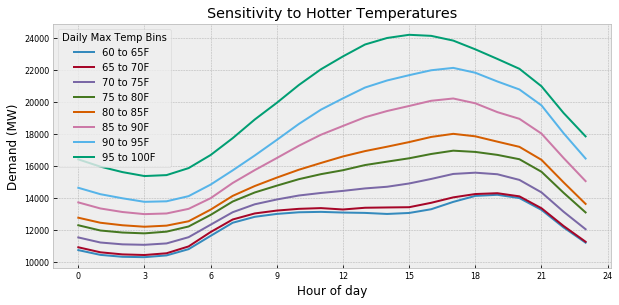

In [14]:
#B. Hourly load by temperature bins
#Create max temp bins
bins = list(range(5,105,5))
names = []
for bin in bins:
    lb = bin-5
    name = f'{lb} to {bin}F' 
    names.append(name)
del names[0]   

data["bins_maxtemp"] = pd.cut(data["tempf_peak"], bins, labels = names)

  
#Plot loads for cooling homes (AC)
bindata = data.loc[data.tempf_peak>=60].pivot_table(
        index =    'hour', columns = 'bins_maxtemp', values = 'mw', aggfunc = 'mean')

bindata.plot(title = "Sensitivity to Hotter Temperatures", figsize = [10, 4.5], fontsize =8)
plt.xlabel("Hour of day")
plt.ylabel("Demand (MW)") 
plt.xticks(np.arange(0,25,3))
plt.legend(loc = 'best', title = "Daily Max Temp Bins")
plt.show()

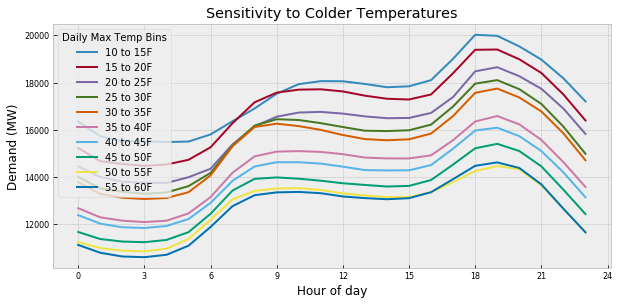

In [15]:
#Plot loads for Heating home (AC)
bindata = data.loc[data.tempf_peak<60].pivot_table(
        index = 'hour', columns = 'bins_maxtemp', values = 'mw', aggfunc = 'mean')

bindata.plot(title = "Sensitivity to Colder Temperatures", figsize = [10, 4.5], fontsize =8)
plt.xlabel("Hour of day")
plt.ylabel("Demand (MW)") 
plt.xticks(np.arange(0,25,3))
plt.legend(loc = 'best', title = "Daily Max Temp Bins")
plt.show()


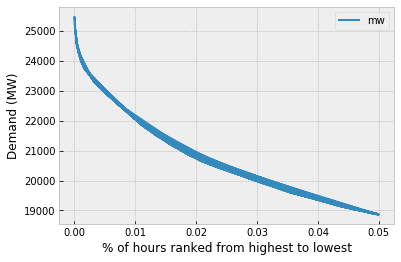

In [16]:
#C. Load duration curve

data['rank'] = data.mw.rank(method= 'first', ascending=False)
data['pctrank'] = data.mw.rank(method= 'first', ascending=False, pct = True)

data.loc[data.pctrank < 0.05].plot.line(x = 'pctrank', y = 'mw')
plt.xlabel("% of hours ranked from highest to lowest")
plt.ylabel("Demand (MW)") 
plt.show()


In [17]:
# Correlation matrix
corr_matrix = data.corr()
corr_matrix["mw"].sort_values(ascending=False)



mw               1.000000
mw_24hrlag       0.873456
mw_3hrlag        0.808010
mw_avg           0.721499
mw_peak          0.721499
mw_weeklag       0.718358
cdh60sqr         0.595732
cdh60            0.567008
cdh_3hrma        0.550923
hdh60sqr         0.508475
hdh60            0.472910
hdd60            0.472910
cdd60            0.472910
hdh_3hrma        0.472474
hdh_24hrma       0.448894
hour             0.446177
cdh_24hrma       0.432576
hdh_weeklag      0.353468
cdh_weeklag      0.340087
tempf            0.214873
tempc            0.214873
tempf_24hrlag    0.203124
tempf_weeklag    0.189451
tempf_3hrlag     0.183053
tempf_peak       0.138046
tempf_avg        0.135435
windspeed        0.125923
dewpoint         0.112523
weekday          0.087301
skycond          0.045089
month            0.035167
dayofyear        0.032972
year            -0.036501
windir          -0.041800
dayofweek       -0.176142
rank            -0.954995
pctrank         -0.954995
usaf                  NaN
wban        

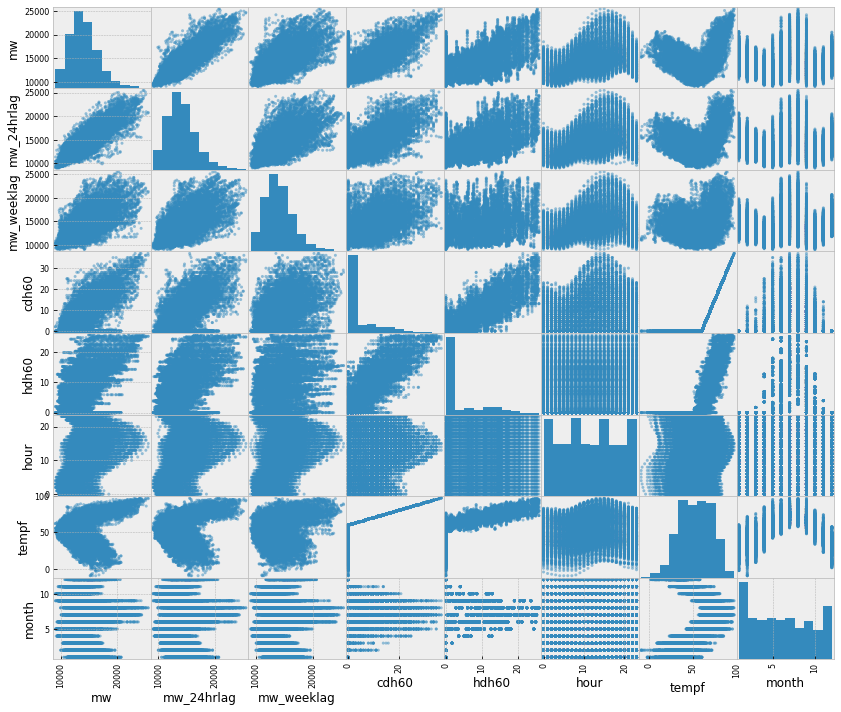

In [23]:
from pandas.plotting import scatter_matrix
col_list = ['mw', 'mw_24hrlag', 'mw_weeklag', 'cdh60', 'hdh60', 'hour', 'tempf', 'month' ]
scatter_matrix(data[col_list], figsize=(14, 12))
plt.show()

# Prep Data for Model Fitting

In [18]:
# Use Pandas get_dummies to convert categorical data
hours = pd.get_dummies(data.hour, prefix = 'hr')
weekdays = pd.get_dummies(data.dayofweek, prefix = 'dow')
data = data.join(hours)
data = data.join(weekdays)
data.head()
data.dropna(inplace = True)

In [19]:
from sklearn.linear_model import LinearRegression



In [29]:
# FUNCTION IS DEFINED TO RUN FOR USER SPECIFIC MODEL, DAYTYPE (WEEKDAY/WEEKEND) AND HOUR
# RETURNS DATASET WITH ACTUAL V. PREDICTED

def runmodel(modeltype, weekday, hr): 

    # 1. Assign X (data) and y (target)
    hrdata  = data.loc[(data.hour == hr) & (data.weekday == weekday), :]
    X = hrdata[['mw_24hrlag', 'mw_weeklag', 'cdh60', 'hdh60', 'cdh_24hrma', 'hdh_24hrma',
                'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6']]

    y = hrdata["mw"].values.reshape(-1, 1)
    #print(X.shape, y.shape)

    # 2. Split the data into training and testing
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777 )

    # 3. Create model and fit it to the scaled training data
    model = modeltype 
    model.fit(X_train, y_train)
    predictions = model.predict(X)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    print(f'Training Data R2: {r2_train}')
    print(f'Testing Data R2: {r2_test}')

    #4.  Add prediction back to main data frame
    mw =y.reshape(1, -1)
    predictions = predictions.reshape(1, -1)
    time = hrdata['datetime']

    mydict = { 
        "datetime": time,
        "mw": mw[0],
        "predicted": predictions[0] 
    }
    newresults = pd.DataFrame(mydict)

    #5. Returns
    return newresults


In [25]:
newdata = runmodel(LinearRegression(), True, 1)

Training Data R2: 0.8433733638481072
Testing Data R2: 0.8305922456777772


# Predictive Models

## Linear Regression (Loop by Hour if we can)

In [52]:
# RUN MODEL FOR EACH HOUR AND FOR WEEKDAY/WEEKEND 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

weekday = [True, False]
hours =  np.arange(24)

results_lfit = pd.DataFrame()

for w in weekday: 
    for h in hours:
        print(f'HOUR {h} Model Scores') 
        hrdata = runmodel(LinearRegression(), w, h)
        results_lfit = results_lfit.append(hrdata)
        
        

HOUR 0 Model Scores
Training Data R2: 0.857947561786761
Testing Data R2: 0.8181927901740096
HOUR 1 Model Scores
Training Data R2: 0.8433733638481072
Testing Data R2: 0.8305922456777772
HOUR 2 Model Scores
Training Data R2: 0.8245798851692645
Testing Data R2: 0.8373878417442123
HOUR 3 Model Scores
Training Data R2: 0.8061025264579627
Testing Data R2: 0.8023854344834884
HOUR 4 Model Scores
Training Data R2: 0.7782973201309448
Testing Data R2: 0.8032756415276201
HOUR 5 Model Scores
Training Data R2: 0.7638319563250735
Testing Data R2: 0.7827511248055548
HOUR 6 Model Scores
Training Data R2: 0.7666582732331062
Testing Data R2: 0.767773868698393
HOUR 7 Model Scores
Training Data R2: 0.8037486684740405
Testing Data R2: 0.7769747778375252
HOUR 8 Model Scores
Training Data R2: 0.8254686373767104
Testing Data R2: 0.7839638537077777
HOUR 9 Model Scores
Training Data R2: 0.8301024102267153
Testing Data R2: 0.8146167886553686
HOUR 10 Model Scores
Training Data R2: 0.8360848680690331
Testing Data R

In [53]:
results_lfit.describe()

,mw,predicted
count,23565.000000,23565.000000
mean,14097.833652,14103.230786
std,2583.702693,2450.314093
min,9016.000000,8650.381591
25%,12264.000000,12344.463576
50%,13794.000000,13876.271257
75%,15538.000000,15449.607338
max,25463.000000,25309.745060


R-square score: 0.8969411569315158


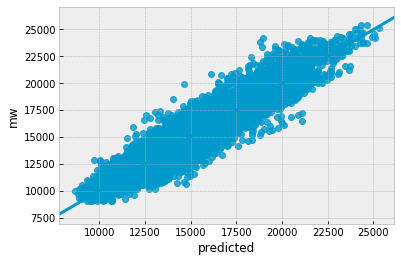

In [54]:
#PLOT ACTUALS V PREDICTED
results_lfit['error'] = results_lfit.predicted - results_lfit.mw 
print(f'R-square score: {r2_score(results_lfit.mw, results_lfit.predicted)}')
sns.regplot(results_lfit.predicted, results_lfit.mw, fit_reg = True, ci = 95, color = (0,0.6,0.8, 0.6))


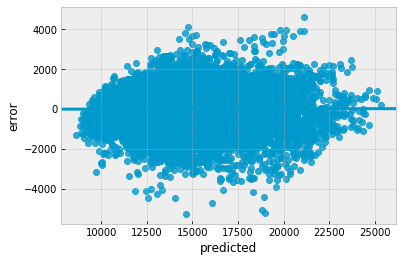

In [55]:
# PLOT RESIDUALS V PREDICTED
sns.regplot(results_lfit.predicted, results_lfit.error, fit_reg = True, ci = 95, color = (0,0.6,0.8, 0.6))

## Net Elastic Regression (or LASSO or Ridge)

In [56]:
#from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

results_enet = pd.DataFrame()
for w in weekday: 
    for h in hours:
        print(f'HOUR {h} Model Scores') 
        hrdata = runmodel(ElasticNet(alpha=.01), w, h)
        results_enet = results_enet.append(hrdata)


HOUR 0 Model Scores
Training Data R2: 0.8569110382733283
Testing Data R2: 0.8203861853754406
HOUR 1 Model Scores
Training Data R2: 0.8431546417833046
Testing Data R2: 0.8275933366460312
HOUR 2 Model Scores
Training Data R2: 0.8245147186820557
Testing Data R2: 0.8371343165847259
HOUR 3 Model Scores
Training Data R2: 0.8060956307832408
Testing Data R2: 0.8025080159675015
HOUR 4 Model Scores
Training Data R2: 0.7782894015299631
Testing Data R2: 0.8034825117751079
HOUR 5 Model Scores
Training Data R2: 0.7638160850671543
Testing Data R2: 0.7832452959067647
HOUR 6 Model Scores
Training Data R2: 0.7666040856997172
Testing Data R2: 0.7695165132306908
HOUR 7 Model Scores
Training Data R2: 0.8036596975093024
Testing Data R2: 0.7776616779557616
HOUR 8 Model Scores
Training Data R2: 0.8253715714649446
Testing Data R2: 0.7870812924755993
HOUR 9 Model Scores
Training Data R2: 0.8300484462845522
Testing Data R2: 0.8156810493238508
HOUR 10 Model Scores
Training Data R2: 0.8360543140181687
Testing Data

C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Training Data R2: 0.832082069269778
Testing Data R2: 0.8431470497968099
HOUR 13 Model Scores
Training Data R2: 0.839729678380388
Testing Data R2: 0.8625763358224209
HOUR 14 Model Scores
Training Data R2: 0.8615826131267611
Testing Data R2: 0.8651266592501434
HOUR 15 Model Scores
Training Data R2: 0.8709703188310977
Testing Data R2: 0.8825971291136491
HOUR 16 Model Scores
Training Data R2: 0.877291787263077
Testing Data R2: 0.8988055313618696
HOUR 17 Model Scores
Training Data R2: 0.8780204447673082
Testing Data R2: 0.8866783120558921
HOUR 18 Model Scores
Training Data R2: 0.8701062235686464
Testing Data R2: 0.8684999672920233
HOUR 19 Model Scores
Training Data R2: 0.8531613724778809
Testing Data R2: 0.852933555416986
HOUR 20 Model Scores
Training Data R2: 0.8486843440101597
Testing Data R2: 0.834912286586405
HOUR 21 Model Scores
Training Data R2: 0.8411980011658717
Testing Data R2: 0.8627505053920311
HOUR 22 Model Scores
Training Data R2: 0.8436657676941587
Testing Data R2: 0.865861960

In [57]:
results_enet.describe()

,mw,predicted
count,23565.000000,23565.000000
mean,14097.833652,14103.180572
std,2583.702693,2448.602444
min,9016.000000,8640.261083
25%,12264.000000,12345.664761
50%,13794.000000,13876.553575
75%,15538.000000,15444.978214
max,25463.000000,25288.586762


R-square score: 0.8969526727980672


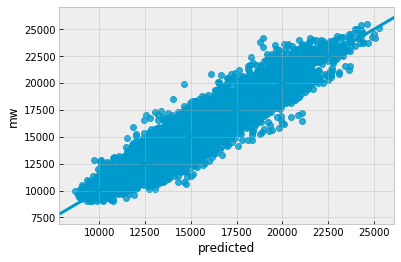

In [58]:
#PLOT ACTUALS V PREDICTED
results_enet['error'] = results_enet.predicted - results_enet.mw 
print(f'R-square score: {r2_score(results_enet.mw, results_enet.predicted)}')
sns.regplot(results_enet.predicted, results_enet.mw, fit_reg = True, ci = 95, color = (0,0.6,0.8, 0.3))

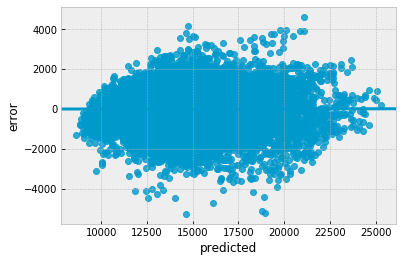

In [59]:
# PLOT RESIDUALS V PREDICTED
sns.regplot(results_enet.predicted, results_enet.error, fit_reg = True, ci = 95, color = (0,0.6,0.8, 0.3))

# Random Forest Regressor

In [74]:
# RUN MODEL FOR EACH HOUR AND FOR WEEKDAY/WEEKEND

from sklearn.ensemble import RandomForestRegressor

results_rfr = pd.DataFrame()
for w in weekday: 
    for h in hours:
        print(f'HOUR {h} Model Scores') 
        hrdata = runmodel(RandomForestRegressor(n_estimators = 500, random_state=7777, max_depth=3, min_samples_leaf=5 ), w, h)
        results_rfr = results_rfr.append(hrdata)


HOUR 0 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8586342629715737
Testing Data R2: 0.8107412543401744
HOUR 1 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8475936800881563
Testing Data R2: 0.8159781017991122
HOUR 2 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8332781770872684
Testing Data R2: 0.8209371888965317
HOUR 3 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8196043387056386
Testing Data R2: 0.7925742014830636
HOUR 4 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7973860466040008
Testing Data R2: 0.7673460936276344
HOUR 5 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7581447372587802
Testing Data R2: 0.7568387215869228
HOUR 6 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7298449993793483
Testing Data R2: 0.7632957148167718
HOUR 7 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7614387099083431
Testing Data R2: 0.7182049082058988
HOUR 8 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7644994355074554
Testing Data R2: 0.7776599105098201
HOUR 9 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7639041880225445
Testing Data R2: 0.7328853667833946
HOUR 10 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7828977524216818
Testing Data R2: 0.6912627239991885
HOUR 11 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7927862958825125
Testing Data R2: 0.7420738033810439
HOUR 12 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7979534980789899
Testing Data R2: 0.7601915392544103
HOUR 13 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8125058695570877
Testing Data R2: 0.7918033607337795
HOUR 14 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8451213772670594
Testing Data R2: 0.7646200221621852
HOUR 15 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8523354094903526
Testing Data R2: 0.828811748325696
HOUR 16 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8648762132372803
Testing Data R2: 0.8111040834026353
HOUR 17 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8598166556907267
Testing Data R2: 0.8153549447977326
HOUR 18 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8463167763962485
Testing Data R2: 0.7939961147813483
HOUR 19 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8319488821921986
Testing Data R2: 0.8051664391169102
HOUR 20 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8335988167167973
Testing Data R2: 0.8014547290593576
HOUR 21 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8358631863806644
Testing Data R2: 0.8215491254701167
HOUR 22 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8438657370508497
Testing Data R2: 0.8270668317055542
HOUR 23 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8489015507833387
Testing Data R2: 0.8247963268545517
HOUR 0 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8191140982524577
Testing Data R2: 0.7870843727865833
HOUR 1 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7824831041148123
Testing Data R2: 0.8195446686195317
HOUR 2 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8070844326133565
Testing Data R2: 0.7261339792804262
HOUR 3 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8085458803086386
Testing Data R2: 0.725074471970887
HOUR 4 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7976589988692153
Testing Data R2: 0.6977292919877557
HOUR 5 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7437785142342254
Testing Data R2: 0.6569520791507764
HOUR 6 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7252453656937619
Testing Data R2: 0.616201638716522
HOUR 7 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7826829821614051
Testing Data R2: 0.5552820338434881
HOUR 8 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.802904736505894
Testing Data R2: 0.6382223317671494
HOUR 9 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8051554300504042
Testing Data R2: 0.6577795306135912
HOUR 10 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7991249400896971
Testing Data R2: 0.6564314582633797
HOUR 11 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8008559915661783
Testing Data R2: 0.6442615744108198
HOUR 12 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8097150104931832
Testing Data R2: 0.6399910518858701
HOUR 13 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.7852868488827744
Testing Data R2: 0.7592972374738708
HOUR 14 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8300704038163316
Testing Data R2: 0.6031049544849221
HOUR 15 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.84934757972487
Testing Data R2: 0.6698501618413895
HOUR 16 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8638742682812321
Testing Data R2: 0.6379589607969446
HOUR 17 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8623943154610894
Testing Data R2: 0.6420327135293722
HOUR 18 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8547163854283591
Testing Data R2: 0.7097005303098247
HOUR 19 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8459216041831225
Testing Data R2: 0.647138610662902
HOUR 20 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.843983182042922
Testing Data R2: 0.7377339361988617
HOUR 21 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8544909235307285
Testing Data R2: 0.7527176844923757
HOUR 22 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8448030981635005
Testing Data R2: 0.8001707903684909
HOUR 23 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Data R2: 0.8465209766299944
Testing Data R2: 0.7851541400086842


In [65]:
results_rfr.describe()

,mw,predicted
count,23565.000000,23565.000000
mean,14097.833652,14092.670575
std,2583.702693,2464.808497
min,9016.000000,9294.620000
25%,12264.000000,12337.740000
50%,13794.000000,13837.620000
75%,15538.000000,15470.100000
max,25463.000000,24438.620000


R-square score: 0.9518240533423767


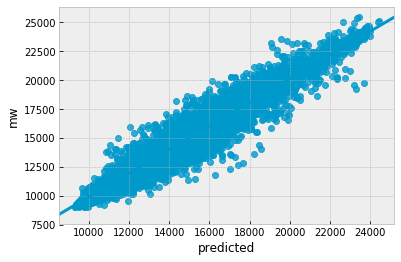

In [66]:
#PLOT ACTUALS V PREDICTED
results_rfr['error'] = results_rfr.predicted - results_rfr.mw 
print(f'R-square score: {r2_score(results_rfr.mw, results_rfr.predicted)}')
sns.regplot(results_rfr.predicted, results_rfr.mw, fit_reg = True, ci = 95, color = (0,0.6,0.8, 0.3))

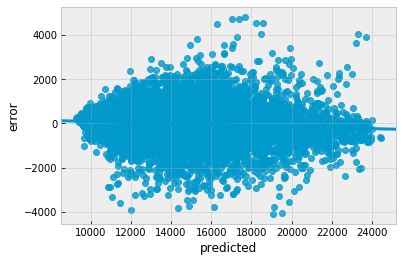

In [67]:
# PLOT RESIDUALS V PREDICTED
sns.regplot(results_rfr.predicted, results_rfr.error, fit_reg = True, ci = 95, color = (0,0.6,0.8, 0.6))

# Support Vector Machine Regression

In [42]:
from sklearn.svm import SVR

results_svr = pd.DataFrame()
for w in weekday: 
    for h in hours:
        print(f'HOUR {h} Model Scores') 
        hrdata = runmodel(SVR(kernel="linear"), w, h)
        results_svr = results_svr.append(hrdata)

HOUR 0 Model Scores


C:\Users\bodej\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Data R2: 0.843187802062752
Testing Data R2: 0.8235823975615804
HOUR 1 Model Scores
Training Data R2: 0.8270469724050683
Testing Data R2: 0.8439145897992595
HOUR 2 Model Scores
Training Data R2: 0.8047630762253043
Testing Data R2: 0.8456567584360546
HOUR 3 Model Scores
Training Data R2: 0.7820417057710413
Testing Data R2: 0.7827783564252655
HOUR 4 Model Scores
Training Data R2: 0.7564472241514386
Testing Data R2: 0.7867060434234807
HOUR 5 Model Scores
Training Data R2: 0.7298609799824639
Testing Data R2: 0.7608818779883219
HOUR 6 Model Scores
Training Data R2: 0.6872052732284469
Testing Data R2: 0.776941158952257
HOUR 7 Model Scores
Training Data R2: 0.6891313501347869
Testing Data R2: 0.6960353367728648
HOUR 8 Model Scores
Training Data R2: 0.7044441720292496
Testing Data R2: 0.7894923676254628
HOUR 9 Model Scores
Training Data R2: 0.7389346500496428
Testing Data R2: 0.7815573483996632
HOUR 10 Model Scores
Training Data R2: 0.7613792013095599
Testing Data R2: 0.750289038639130

In [48]:
results_svr.describe()

,mw,predicted
count,23565.000000,23565.000000
mean,14097.833652,14048.449535
std,2583.702693,2381.987329
min,9016.000000,8489.497461
25%,12264.000000,12368.246686
50%,13794.000000,13827.169745
75%,15538.000000,15366.308582
max,25463.000000,24491.053830


R-square score: 0.8623481707462076


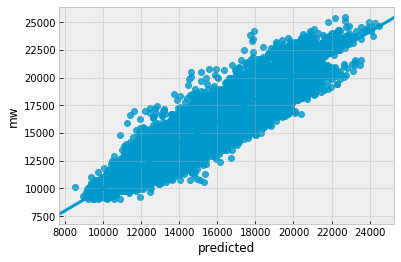

In [49]:
#PLOT ACTUALS V PREDICTED
results_rfr['error'] = results_svr.predicted - results_svr.mw 
print(f'R-square score: {r2_score(results_svr.mw, results_svr.predicted)}')
sns.regplot(results_svr.predicted, results_svr.mw, fit_reg = True, ci = 95, color = (0,0.6,0.8, 0.3))